In [1]:

import pandas as pd
import numpy as np
df=pd.read_csv("C:/Users/Archana/OneDrive/Attachments/Desktop/MDTM46B/Project 3-Youtube/youtube_ad_revenue_dataset.csv")
df.head()



,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [3]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [4]:
df=df.drop(columns=['video_id','date'],axis = 1)  #['video_id', 'date',Unique Columns which has no inherent relationship to target feature 
df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...
122395,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [5]:
df.duplicated().sum()

np.int64(2400)

In [6]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

np.int64(0)

In [7]:
numeric_cols = ['views','likes','comments','watch_time_minutes','video_length_minutes','subscribers','ad_revenue_usd']

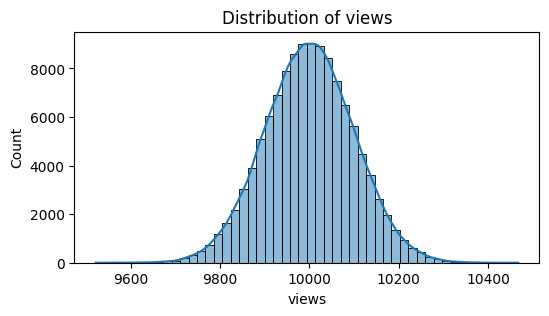

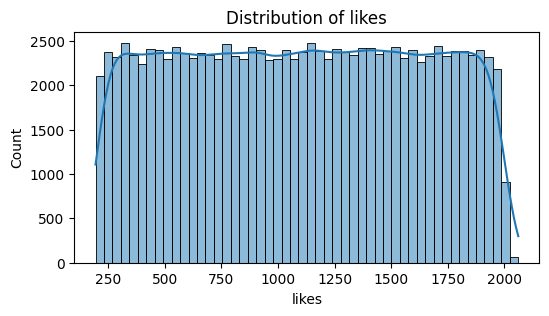

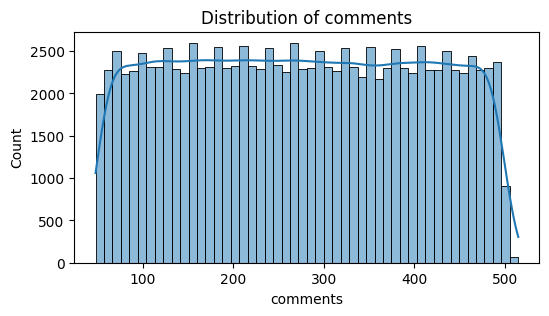

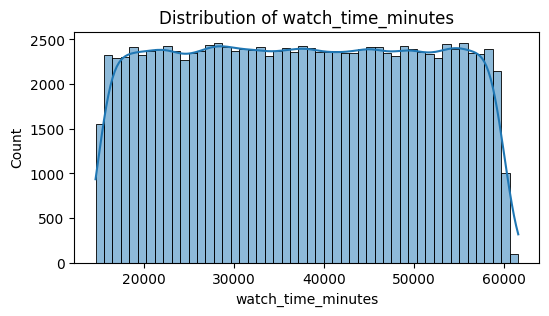

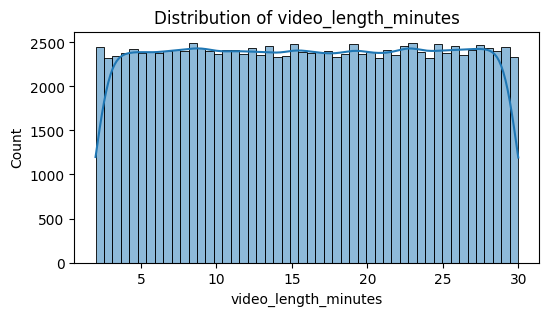

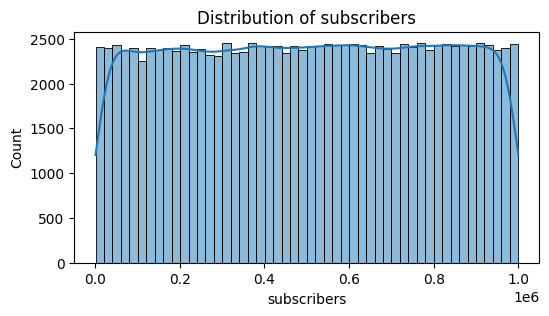

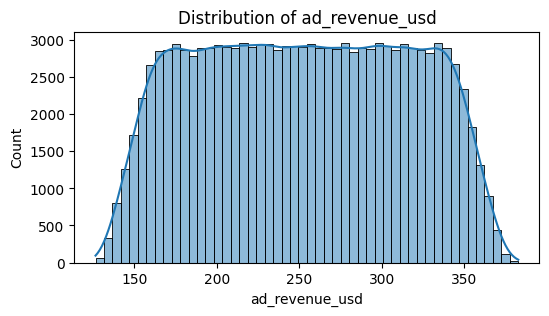

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [9]:
from scipy.stats import skew
skewness = df[numeric_cols].skew()
print(skewness)

views                  -0.002912
likes                  -0.002202
comments                0.008230
watch_time_minutes      0.001531
video_length_minutes   -0.001861
subscribers            -0.009575
ad_revenue_usd          0.000948
dtype: float64


In [10]:
df.isnull().sum()

views                      0
likes                   6000
comments                6000
watch_time_minutes      6000
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [11]:
#Handling missing values
from sklearn.impute import SimpleImputer 
num_cols = ['likes', 'comments','watch_time_minutes']
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
df.isnull().sum().to_list()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
#feature engineering
# Engagement rate (safe division)
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views'].replace(0, np.nan)



df.shape

(120000, 11)

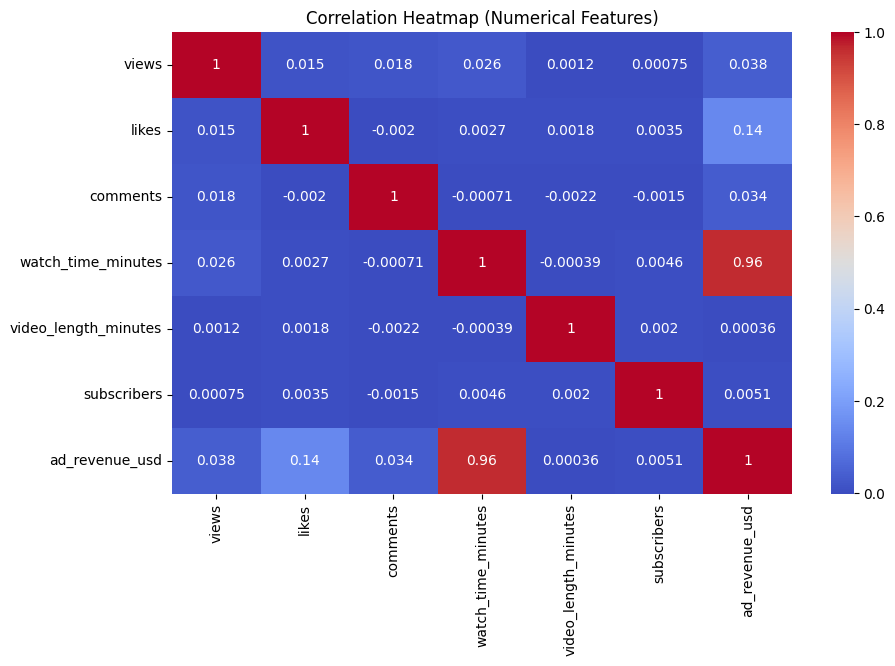

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [14]:
df=df.reset_index(drop=True)
df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate
0,9936,1221.0,320.000000,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155093
1,10017,642.0,346.000000,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098632
2,10097,1979.0,187.000000,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214519
3,10034,1191.0,242.000000,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,0.142814
4,9889,1858.0,477.000000,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,0.236121
...,...,...,...,...,...,...,...,...,...,...,...
119995,9853,1673.0,147.000000,42075.704885,25.490195,210818,Education,Tablet,US,280.986396,0.184715
119996,10128,1709.0,63.000000,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981,0.174961
119997,10267,700.0,274.349842,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106,0.094901
119998,10240,1616.0,106.000000,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811,0.168164


In [15]:
category_cols =['category','device','country']
for i in category_cols:
    print(f"{i} unique:",df[i].unique())

category unique: ['Entertainment' 'Gaming' 'Education' 'Music' 'Tech' 'Lifestyle']
device unique: ['TV' 'Tablet' 'Mobile' 'Desktop']
country unique: ['IN' 'CA' 'UK' 'US' 'DE' 'AU']


In [16]:
from sklearn.preprocessing import OneHotEncoder


# Perform one-hot encoding on the specified categorical columns
onehot = OneHotEncoder(sparse_output=False)
encoded =onehot.fit_transform(df[['category','device','country']])
df_encode=pd.DataFrame(encoded,columns=onehot.get_feature_names_out())
df_encoded =pd.concat([df,df_encode],axis=1)

df_encoded.tail()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,...,device_Desktop,device_Mobile,device_TV,device_Tablet,country_AU,country_CA,country_DE,country_IN,country_UK,country_US
119995,9853,1673.0,147.000000,42075.704885,25.490195,210818,Education,Tablet,US,280.986396,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
119996,10128,1709.0,63.000000,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119997,10267,700.0,274.349842,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
119998,10240,1616.0,106.000000,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119999,9931,770.0,274.349842,38466.837135,27.305703,517587,Tech,TV,CA,253.842824,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
df_encoded=df_encoded.drop(columns=['category','device','country']) # Since it is encoded no longer needed this columns

In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   views                   120000 non-null  int64  
 1   likes                   120000 non-null  float64
 2   comments                120000 non-null  float64
 3   watch_time_minutes      120000 non-null  float64
 4   video_length_minutes    120000 non-null  float64
 5   subscribers             120000 non-null  int64  
 6   ad_revenue_usd          120000 non-null  float64
 7   engagement_rate         120000 non-null  float64
 8   category_Education      120000 non-null  float64
 9   category_Entertainment  120000 non-null  float64
 10  category_Gaming         120000 non-null  float64
 11  category_Lifestyle      120000 non-null  float64
 12  category_Music          120000 non-null  float64
 13  category_Tech           120000 non-null  float64
 14  device_Desktop      

In [19]:
#Important Feature to predict the target column
feature_col=[df_encoded.columns]

In [20]:
X = df_encoded.drop("ad_revenue_usd",axis=1) # Input features pc
y = df_encoded["ad_revenue_usd"]

In [21]:
X.shape, y.shape

((120000, 23), (120000,))

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42) # Training data 80% and testing data 20% splitted from dataset
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((96000, 23), (24000, 23), (96000,), (24000,))

In [23]:
from sklearn.preprocessing import StandardScaler

# Scaling of the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import math

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


models = {

    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
}


results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)         
    y_pred = model.predict(X_test_scaled) 
    

    results[name] = {
        "R2_SCORE": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE":math.sqrt(mean_squared_error(y_test, y_pred))
    }

results_df = pd.DataFrame(results).T.sort_values("R2_SCORE", ascending=False)
print(results_df)



                  R2_SCORE         MSE        MAE       RMSE
LinearRegression  0.952574  181.711614   3.111614  13.480045
RandomForest      0.949731  192.602907   3.601653  13.878145
SVR               0.949248  194.456114   5.139467  13.944752
DecisionTree      0.898303  389.649529   5.437061  19.739542
KNN               0.858127  543.584281  17.111078  23.314894


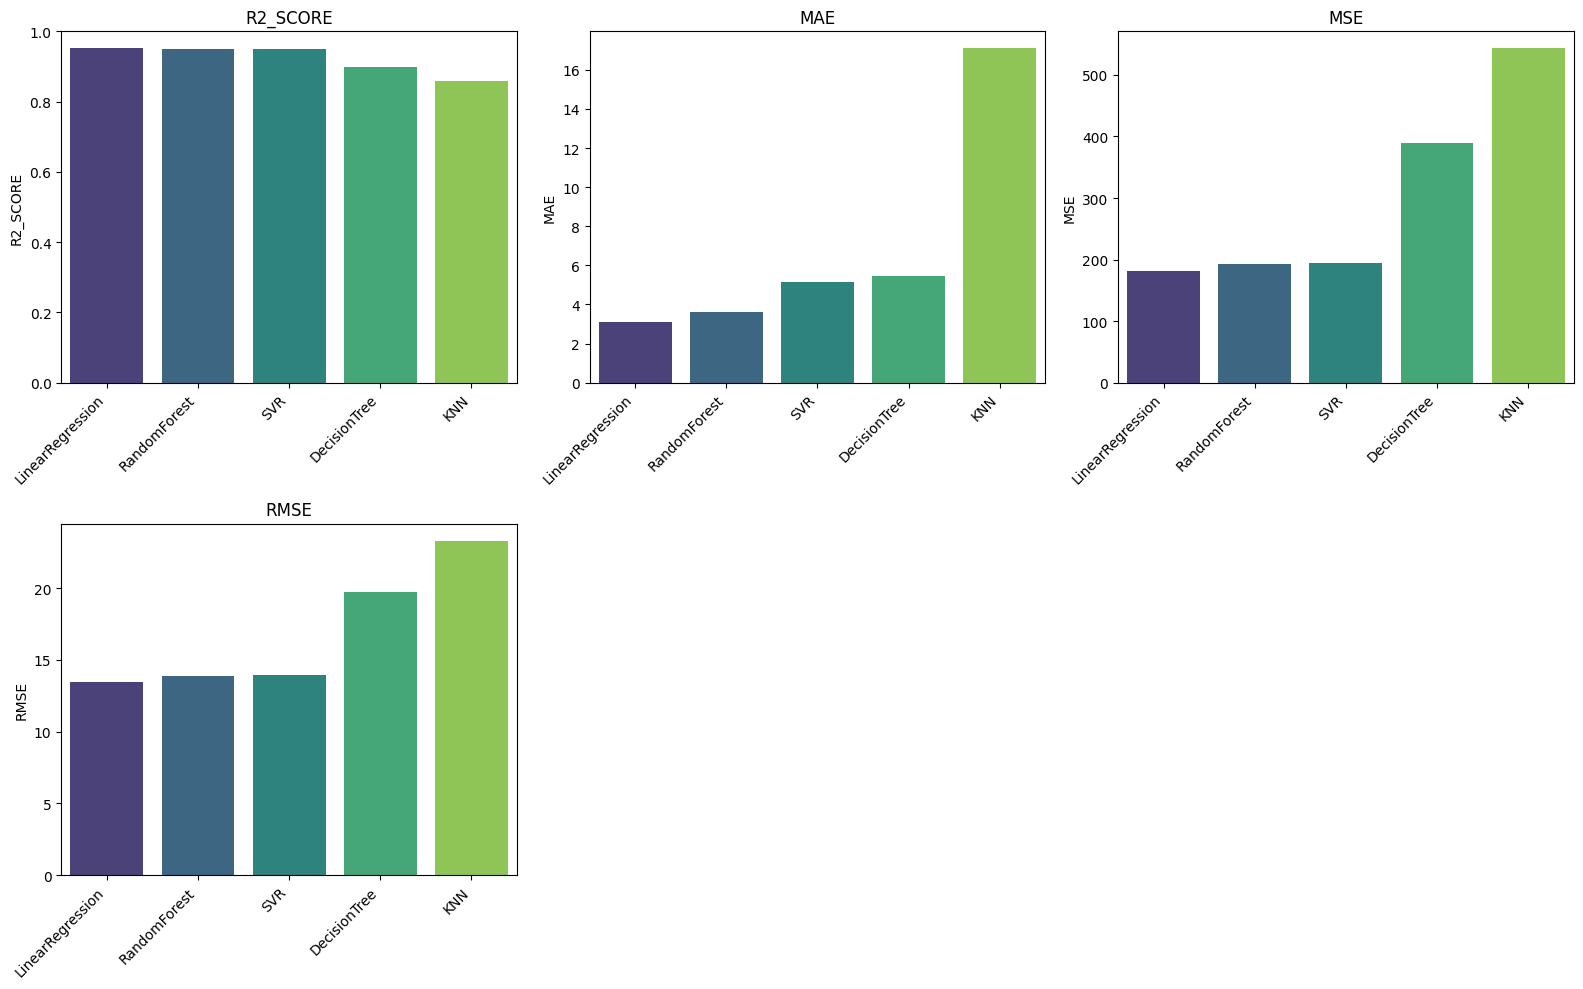

In [25]:
# reset index so "Model" is a column
plot_df = results_df.reset_index().rename(columns={"index": "Model"})

metrics = ["R2_SCORE", "MAE","MSE","RMSE"]

plt.figure(figsize=(16,10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 cols
    sns.barplot(x="Model", y=metric, data=plot_df, palette="viridis",hue='Model',legend=False)
    plt.xticks(rotation=45, ha="right")
    plt.title(metric)
    plt.xlabel("")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

In [26]:
# final model selection
best_model_name = plot_df.iloc[0]['Model']

best_r2 = plot_df.iloc[0]['R2_SCORE']
MAE = plot_df.iloc[0]['MAE']
RMSE = plot_df.iloc[0]['RMSE']

print(f"🏆 Best Model: {best_model_name}")
print(f"📊 R² Score: {best_r2:.4f}")
print(f"📏 MAE: {MAE:.4f}")
print(f"📐 RMSE: {RMSE:.4f}")

🏆 Best Model: LinearRegression
📊 R² Score: 0.9526
📏 MAE: 3.1116
📐 RMSE: 13.4800


In [27]:
import joblib
numeric_col=['views','likes','comments','watch_time_minutes','video_length_minutes','subscribers','engagement_rate','views_per_subscriber']
categoric_col=['category','device','country']

# Save the trained models
for name, model in models.items():
    joblib.dump(model, f"{name.replace(' ', '_').lower()}_model.pkl")   
    
joblib.dump(scaler, "scaler.pkl")
joblib.dump(onehot, "encoder.pkl")

joblib.dump(numeric_col, "numeric_col.pkl")
joblib.dump(categoric_col, "categoric_col.pkl")
joblib.dump(feature_col, "feature_col.pkl")
print(" Model, Scaler, Encoder, Feature Names saved successfully!")
# Load model and scaler with joblib
model = joblib.load("Linearregression_model.pkl")




 Model, Scaler, Encoder, Feature Names saved successfully!


In [28]:
import math# Take a few rows from test set
sample_X = X_test_scaled[:100]
sample_y = y_test[:100]

# Predict
y_pred = model.predict(sample_X)

# Print results
print("/n🔎 Sample Predictions vs Actuals:")
for i in range(len(y_pred)):
    print(f" Predicted: ${y_pred[i]:.2f} | Actual: ${sample_y.iloc[i]:.2f}")
print('r2_score : ', (r2_score(sample_y, y_pred)))

/n🔎 Sample Predictions vs Actuals:
 Predicted: $352.93 | Actual: $352.85
 Predicted: $342.24 | Actual: $341.98
 Predicted: $204.56 | Actual: $204.59
 Predicted: $176.42 | Actual: $176.84
 Predicted: $270.88 | Actual: $270.84
 Predicted: $287.65 | Actual: $287.48
 Predicted: $260.08 | Actual: $259.94
 Predicted: $261.47 | Actual: $261.09
 Predicted: $275.11 | Actual: $275.04
 Predicted: $307.21 | Actual: $307.01
 Predicted: $357.33 | Actual: $357.18
 Predicted: $285.49 | Actual: $285.67
 Predicted: $287.61 | Actual: $287.49
 Predicted: $238.63 | Actual: $238.66
 Predicted: $205.06 | Actual: $204.88
 Predicted: $283.32 | Actual: $283.43
 Predicted: $192.10 | Actual: $191.93
 Predicted: $253.70 | Actual: $253.90
 Predicted: $331.50 | Actual: $339.93
 Predicted: $215.19 | Actual: $220.67
 Predicted: $343.63 | Actual: $343.31
 Predicted: $188.38 | Actual: $188.16
 Predicted: $184.60 | Actual: $184.75
 Predicted: $249.14 | Actual: $345.03
 Predicted: $266.95 | Actual: $263.16
 Predicted: $21